In [10]:
import numpy as np  # 导入包
import matplotlib.pyplot as plt
import statsmodels.api as sm

nsample = 20  #生成20个样本点
x = np.linspace(0, 10, nsample)  # 从0-10之间生成20个数
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

**一元线性回归**

In [11]:
X = sm.add_constant(x)  # 生成第一列都是1，第二列是原始数据
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [12]:
#β0，β1分别设置成2，5
beta = np.array([2,5])
beta

array([2, 5])

In [13]:
#构造一个高斯分布的误差项
e = np.random.normal(size = nsample)
e

array([-0.44917782, -0.7881134 , -0.41908437,  0.03441592, -1.52404766,
       -0.00416825, -0.65333685,  1.67840733,  1.52347633, -0.43867697,
        0.22222029,  0.61150455, -2.23946729,  1.22670988,  0.17836627,
        0.66150276, -1.77887457,  0.37328361,  1.94511935, -0.05179077])

In [14]:
#实际值y
y = np.dot(X, beta) + e
y

array([ 1.55082218,  3.84346555,  6.84407352,  9.92915276, 11.00226813,
       15.15372648, 17.13613683, 22.09945996, 24.57610791, 25.24553356,
       28.53800976, 31.55887297, 31.33948008, 37.4372362 , 39.02047153,
       42.13518697, 42.32638858, 47.11012572, 51.3135404 , 51.94820923])

In [15]:
#最小二乘法
model = sm.OLS(y, X)

In [16]:
#拟合数据
res = model.fit()

In [17]:
#回归系数
res.params  # 求出的结果就是β0和β1，会有一些差距，因为数据点比较少，可以早多点数据点

array([1.58035731, 5.08501122])

In [18]:
#全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3853.
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.89e-22
Time:                        21:52:46   Log-Likelihood:                -29.445
No. Observations:                  20   AIC:                             62.89
Df Residuals:                      18   BIC:                             64.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5804      0.479      3.298      0.004       0.574       2.587
x1             5.0850      0.082     62.075      0.000       4.913       5.257
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   2.429
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                0.560
Skew:                          -0.408   Prob(JB):                        0.756
Kurtosis:                       3.073   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:R方值，评估线性回归方程好不好，主要看R方
Adj. R-squared:	调整后R方值
Prob (F-statistic):检验是否可用线性回归方程，越小线性关系越强
No. Observations:	观察的样本
const：常数项，对应β0
x1：对应β1

In [19]:
#拟合的估计值
y_ = res.fittedvalues
y_

array([ 1.58035731,  4.256679  ,  6.9330007 ,  9.60932239, 12.28564409,
       14.96196578, 17.63828748, 20.31460918, 22.99093087, 25.66725257,
       28.34357426, 31.01989596, 33.69621766, 36.37253935, 39.04886105,
       41.72518274, 44.40150444, 47.07782614, 49.75414783, 52.43046953])

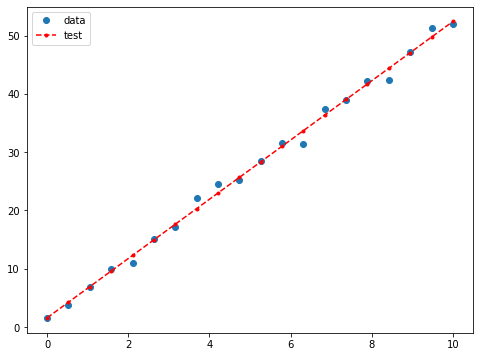

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')  # 原始数据
ax.plot(x,y_,'r--.',label='test')  #拟合数据
ax.legend(loc='best')
plt.show()

可以看到非常接近原始值